<a href="https://colab.research.google.com/github/SriNavya413/Data-Analyst/blob/main/Project_1--%5B6-12-2024%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1:- Read the dataset **
By using pandas .read_csv() function and storing it to the variable  , by
simple run the variable we see the data which is stored in that variabl

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [8]:
df = pd.read_csv('/content/dataset.csv')


In [9]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


# **TASK 02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT**



*   For checking the null values we use here **.isnull()**  function for counting we add **.sum()** function to it . To know how many nulls are present in each column { **.isnull().sum() **}
*   For checking the duplicated values we use here **.duplicated() **function for counting we add **.sum()** function to it . To know how many nulls are present in each column {  **.duplicated().sum()** }


In [10]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Missing values per column:
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
Number of duplicate rows: 0


# **TASK 03 - PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE**



*   we use matplotlib module for plotting the graph
*   we draw the graph based on season , Holiday , weekend , weathercode.
for tittle card we use tiltle() method and displaying graph show() method.




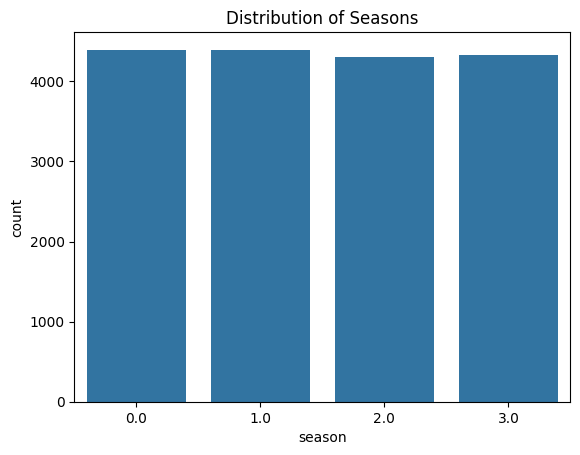

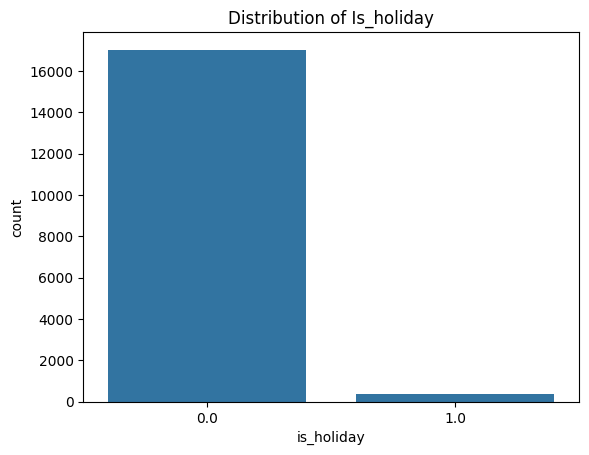

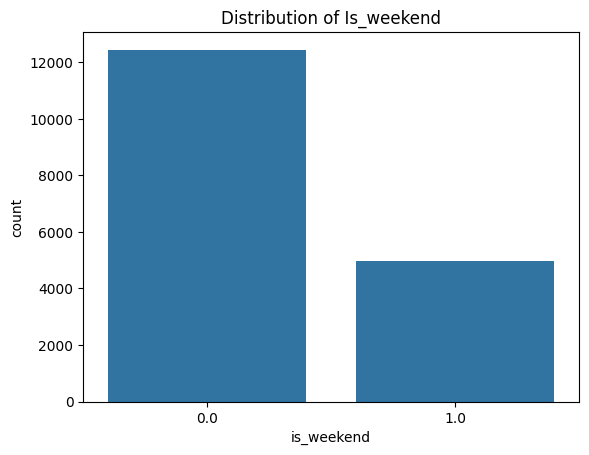

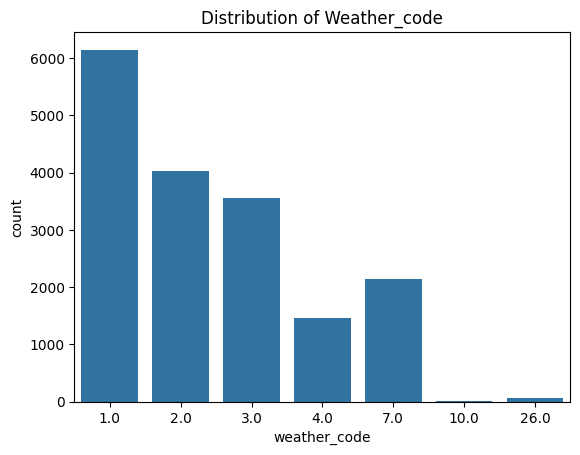

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plot distribution for 'season'
# Changed 'df' to 'data' to match the DataFrame variable name
sns.countplot(data=data, x='season')
plt.title('Distribution of Seasons')
plt.show()

# Repeat for 'is_holiday', 'is_weekend', 'weather_code'
for col in ['is_holiday', 'is_weekend', 'weather_code']:  # Corrected column names here
    # Changed 'df' to 'data' here as well
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.show()

# **TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX**

Here we done ,


*   First we check the datetype of 'timestamp' column for thid we use
            **.dtypes** keyword
*   Then we change it to Date formatte by uysing the  " **.to_datetime() **"
     function.
*   Finally we keep the time as the index to this dataset.





In [ ]:
# Check data types
print(data.dtypes)  # Change 'df' to 'data'

# Convert 'timestamp' column to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Change 'df' to 'data'
data.set_index('timestamp', inplace=True)  # Change 'df' to 'data'

# Confirm changes
print(data.head())  # Change 'df' to 'data'
print(data.index)  # Change 'df' to 'data'


timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0 

# **TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC**.

**we extract the data from dataset by based upon the day of week , Month , Hour, Season , Year.**

In [ ]:
# Extracting new time-based columns
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['season'] = df['month'] % 12 // 3 + 1  # Example for deriving season

# Verify new columns
print(df.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  hour  day_of_week  \
timestamp                                                                
2015-01-04 00:00:00         0.0         1.0       1     0            6   
2015-01-04 01:00:00         0.0         1.0       1     1            6   
2015-01-04 02:00:00         0.0         1.0       1     2            6   
2015-01-04 03:00:00         0.0         1.0       1     3            6   
2015-01-04 04:00:00         0.0         1.0       1     4 

# **TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP**



*   In this step first we find the correlation between two variables one to many by using **" .corr() " **function
*   Next we display values through heatmap .

          1.   figsize=(height,width) -> used to display the size of heatmap
          2.   cmap =" " -> used to show the how should be look
          3.   fmt -> used to show the make size of each boxes.








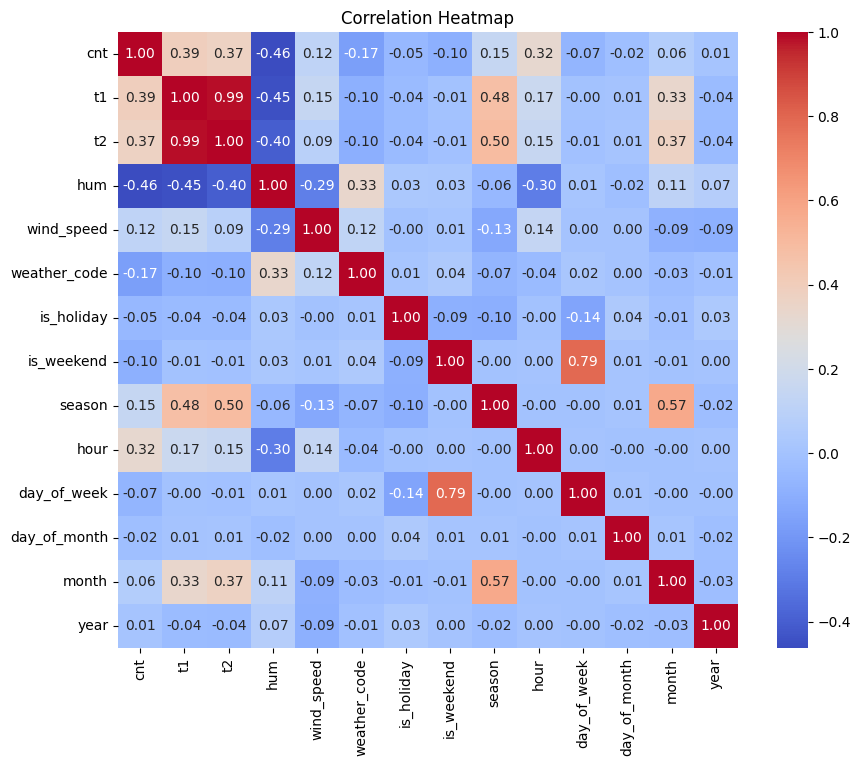

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# **TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOT**
Here we draw the barchat by using **" .barplot(x= value , y=value ) "**


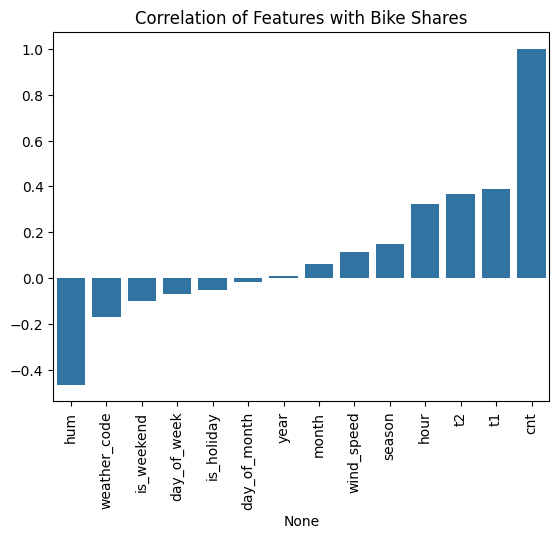

In [ ]:
# Correlation with target
# Replace 'bike_shares' with the actual name of your target column
correlations = df.corr()['cnt'].sort_values()

# Plot barplot
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Bike Shares')
plt.show()

# **TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT**

In this step we draw the lineplot chart by taking x-axis as Time and y-axis as Bike shares .
xlabel() is nothing but x-axis and ylable() is y-axis.


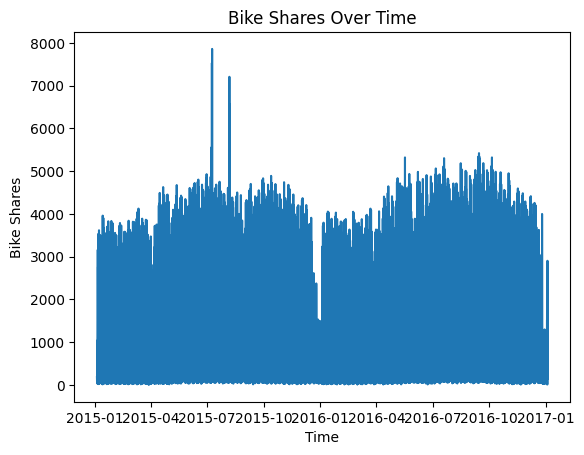

In [ ]:
# Lineplot of bike shares over time
# Assuming 'cnt' is the correct column name for bike shares
sns.lineplot(data=df, x=df.index, y='cnt')
plt.title('Bike Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Bike Shares')
plt.show()


# **TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)**

In this step we draw the lineplot and barplot graphs by taking
x-axis as month , y-axis as cnt {shares}

<ipython-input-47-a80241144fba>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='cnt', hue='year', ci=None)  # Changed 'bike_shares' to 'cnt'


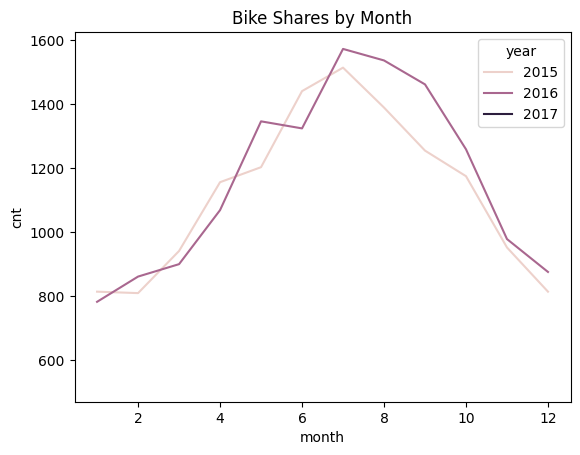

<ipython-input-47-a80241144fba>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='cnt', hue='year', ci=None)  # Changed 'bike_shares' to 'cnt'


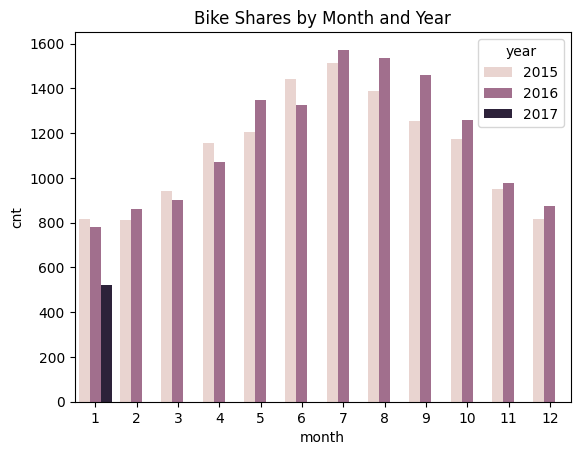

In [ ]:
# Lineplot by months
sns.lineplot(data=df, x='month', y='cnt', hue='year', ci=None)  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Month')
plt.show()

# Barplot by year and month
sns.barplot(data=df, x='month', y='cnt', hue='year', ci=None)  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Month and Year')
plt.show()


# **TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)**

We find the how many shares are going on market in holidays , weekend,season based upon the hours.

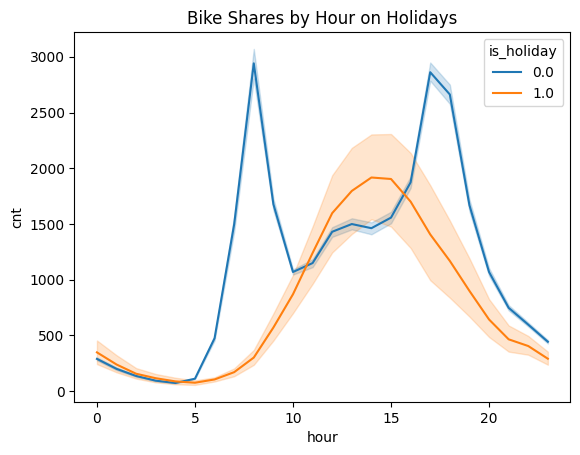

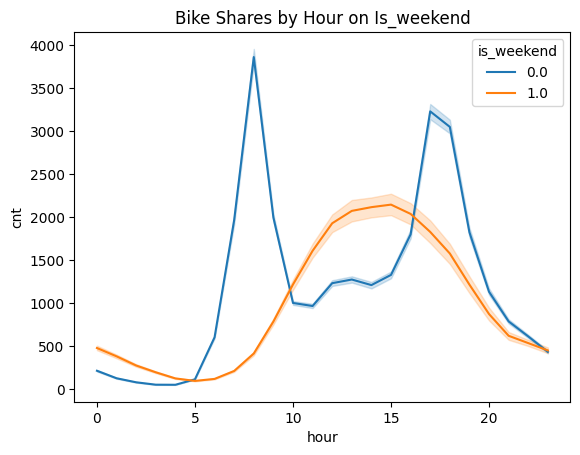

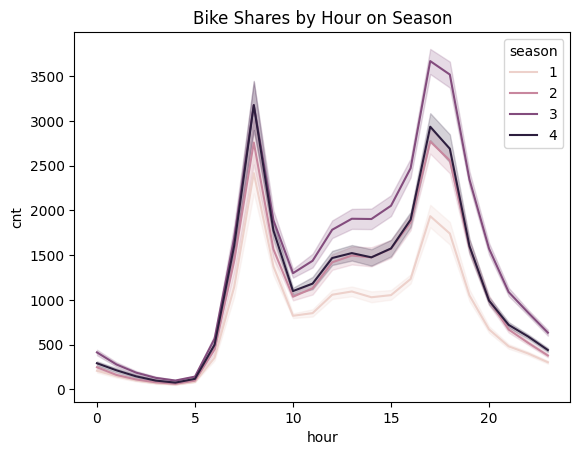

In [ ]:
# Example for holidays
sns.lineplot(data=df, x='hour', y='cnt', hue='is_holiday') # Changed y to 'cnt' and hue to 'is_holiday'
plt.title('Bike Shares by Hour on Holidays')
plt.show()

# Repeat for 'weekend' and 'season'
for col in ['is_weekend', 'season']: # Changed to 'is_weekend' to match the column name
    sns.lineplot(data=df, x='hour', y='cnt', hue=col) # Changed y to 'cnt'
    plt.title(f'Bike Shares by Hour on {col.capitalize()}')
    plt.show()


# **TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK**
We draw the barplot for day_of_week and cnt columns as x-axis and y-axis. by
       using  **" .barplot() "**

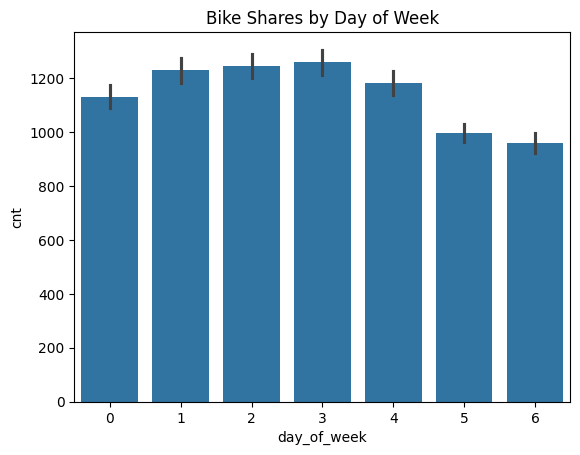

In [ ]:
sns.barplot(data=df, x='day_of_week', y='cnt') # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Day of Week')
plt.show()

# **TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH**

Here we plot a graph by using day_of_month and cnt .
This graph shows the what days of the bike shares are high in a month.


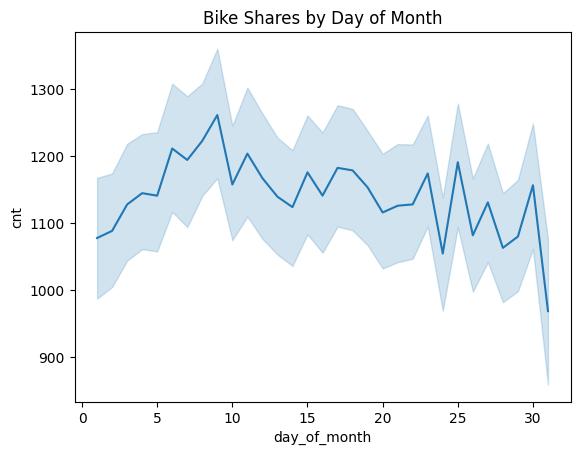

In [ ]:
sns.lineplot(data=df, x='day_of_month', y='cnt')  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Day of Month')
plt.show()

# **TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON**
Here we draw the bar chat
  1. By taking year and cnt
  2. By taking holidays in a season and cnt

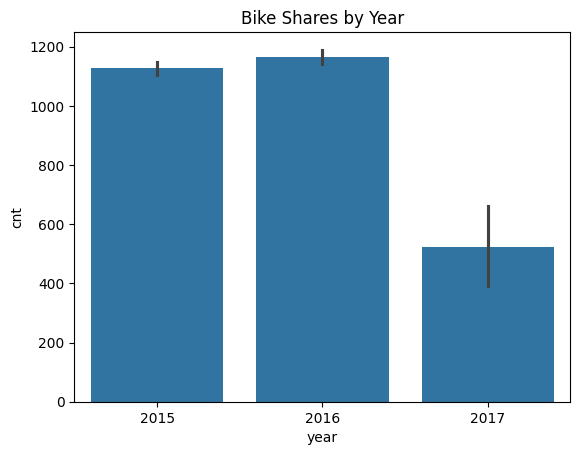

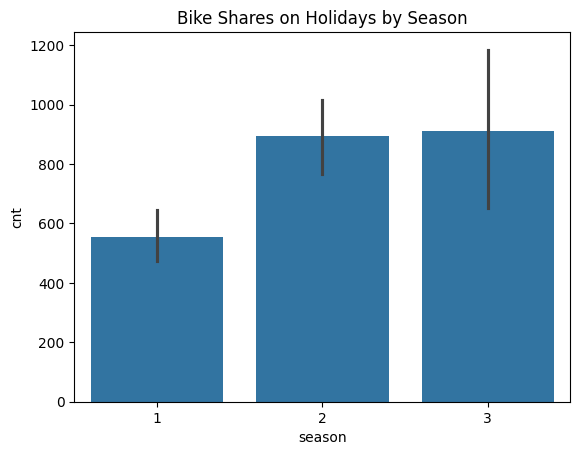

In [ ]:
# Plot by year
sns.barplot(data=df, x='year', y='cnt')  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Year')
plt.show()

# Plot holidays by season
sns.barplot(data=df[df['is_holiday'] == 1], x='season', y='cnt')  # Changed 'bike_shares' to 'cnt' and 'holiday' to 'is_holiday'
plt.title('Bike Shares on Holidays by Season')
plt.show()


# **TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT**

We draw the piechart and bar chart by taking the no.of shares as priority for both weekdays and weekends.


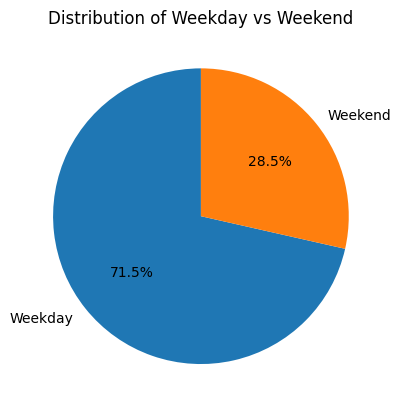

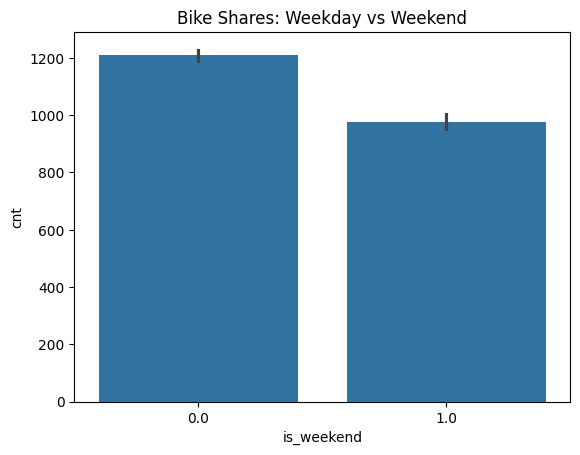

In [ ]:
# Pie chart
# Assuming 'is_weekend' column represents weekend status (0 or 1)
weekend_counts = df['is_weekend'].value_counts()  # Changed 'weekend' to 'is_weekend'
plt.pie(weekend_counts, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weekday vs Weekend')
plt.show()

# Barplot
# Using 'is_weekend' and assuming 'cnt' represents bike shares
sns.barplot(data=df, x='is_weekend', y='cnt')  # Changed 'weekend' to 'is_weekend' and 'bike_shares' to 'cnt'
plt.title('Bike Shares: Weekday vs Weekend')
plt.show()

# **TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON**
Here we draw the graph for weather_code and season based on distribution

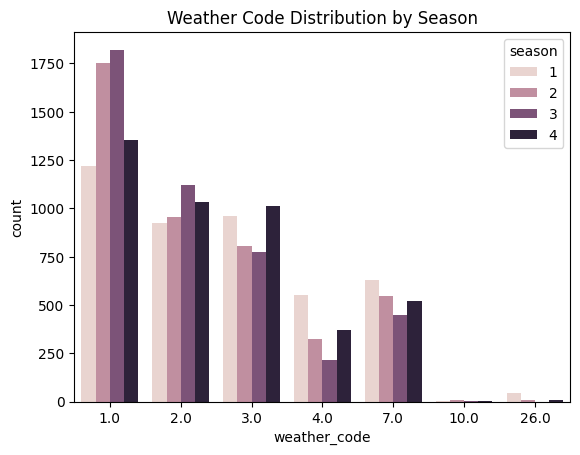

In [ ]:
sns.countplot(data=df, x='weather_code', hue='season')
plt.title('Weather Code Distribution by Season')
plt.show()
